In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
# Read in spread dataset
df = pd.read_csv('~/Downloads/archive/spreadspoke_scores.csv')
df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [85]:
teams = pd.read_csv('~/Downloads/archive/nfl_teams.csv')
teams['team_favorite_id'] = teams['team_id']
teams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002,team_favorite_id
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West,ARI
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West,ATL
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East,IND
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central,BAL
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN,NE


In [86]:
# Pull in only games for which there is spread info
df = df.loc[~df.spread_favorite.isna()]

In [87]:
df['point_diff'] = df.score_home - df.score_away

In [88]:
teams[['team_name', "team_favorite_id"]]

,team_name,team_favorite_id
0,Arizona Cardinals,ARI
1,Atlanta Falcons,ATL
2,Baltimore Colts,IND
3,Baltimore Ravens,BAL
4,Boston Patriots,NE
5,Buffalo Bills,BUF
6,Carolina Panthers,CAR
7,Chicago Bears,CHI
8,Cincinnati Bengals,CIN
9,Cleveland Browns,CLE


In [89]:
# Merge in team data
df = df.merge(teams[['team_name', "team_favorite_id"]], on="team_favorite_id", how="left")
df['favorite_name'] = df['team_name']

df = df.loc[df.team_name == df.favorite_name]
df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,point_diff,team_name,favorite_name
0,1/15/1967,1966,Superbowl,True,Green Bay Packers,35.0,10.0,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90.0,NaN,25.0,Green Bay Packers,Green Bay Packers
1,1/14/1968,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN,19.0,Green Bay Packers,Green Bay Packers
2,1/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain,-9.0,Baltimore Colts,Baltimore Colts
3,1/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain,-9.0,Indianapolis Colts,Indianapolis Colts
4,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain,16.0,Minnesota Vikings,Minnesota Vikings


In [90]:
# Logic for determining if 
def actual_spread(home, favorite, diff):
    if home == favorite:
        return -diff
    else:
        return diff

# IF Home team favored 
# make actual pt diff negative, since we subtract Home pts - Away Pts
df['actual_spread'] = df.apply(lambda x: actual_spread(x['team_home'], x['favorite_name'], x['point_diff']), axis=1)
df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,point_diff,team_name,favorite_name,actual_spread
0,1/15/1967,1966,Superbowl,True,Green Bay Packers,35.0,10.0,Kansas City Chiefs,GB,-14.0,...,Los Angeles Memorial Coliseum,True,54.0,7.0,90.0,NaN,25.0,Green Bay Packers,Green Bay Packers,-25.0
1,1/14/1968,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,...,Orange Bowl,True,60.0,12.0,74.0,NaN,19.0,Green Bay Packers,Green Bay Packers,-19.0
2,1/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,...,Orange Bowl,True,66.0,12.0,80.0,rain,-9.0,Baltimore Colts,Baltimore Colts,9.0
3,1/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,...,Orange Bowl,True,66.0,12.0,80.0,rain,-9.0,Indianapolis Colts,Indianapolis Colts,-9.0
4,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,...,Tulane Stadium,True,55.0,14.0,84.0,rain,16.0,Minnesota Vikings,Minnesota Vikings,16.0


In [93]:
df.to_csv("game_results.csv", index=False)

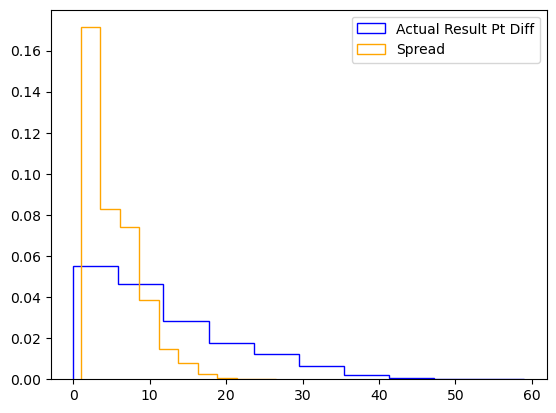

In [91]:
# plot spreads vs pt differential
plt.hist(abs(df.point_diff), histtype="step", color="blue", bins=10, density=True, label="Actual Result Pt Diff")
plt.hist(abs(df.spread_favorite), histtype="step", color="orange", bins=10, density=True, label="Spread")

plt.legend()

In [ ]:
from 